# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [0]:
def mean(a):
  return sum(a)/len(a)

def variance(a):
  mean_ = mean(a)
  a_len = len(a)
  b = [0] * a_len
  for i, x in enumerate(a):
    b[i] = (x - mean_)**2
  return sum(b)/(a_len)

def stdev(a):
  return variance(a)**0.5

def weird_variance(a):
  mean_ = mean(a)
  a_len = len(a)
  b = [0] * a_len
  for i, x in enumerate(a):
    b[i] = (x - mean_)**2
  return sum(b)

In [105]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
print(mean(sales))
print(variance(sales))
print(stdev(sales))

3052.714285714286
183761.06122448976
428.67360686714756


In [106]:
print(np.mean(sales))
print(np.var(sales))
print(np.std(sales))

3052.714285714286
183761.06122448976
428.67360686714756


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [58]:
num_cust = [127, 80, 105, 92, 120, 115, 93]
cov = np.cov(sales, num_cust, ddof=0)
print(cov)
print(np.var(num_cust))
print(np.var(sales))

[[183761.06122449   6518.02040816]
 [  6518.02040816    249.3877551 ]]
249.3877551020408
183761.06122448976


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [74]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
num_cust = [127, 80, 105, 92, 120, 115, 93]

covariance = np.cov(sales, num_cust, ddof=0)

cust_std = np.std(num_cust)
sales_std = np.std(sales)
divisor = weird_variance(sales) * weird_variance(num_cust)
# divisor = cust_std * sales_std

std_cov = np.zeros((2, 2))
for i in range(covariance.shape[0]):
  for j in range(covariance.shape[1]):
    std_cov[i, j] = cov[i, j] / div
print(std_cov)

[[1.41029925e-08 5.00234339e-10]
 [5.00234339e-10 1.91396024e-11]]


In [107]:
sales_mean, cust_mean = mean(sales), mean(num_cust)
top = sum([(x - sales_mean) * (y - cust_mean) for x, y in zip(sales, num_cust)])
bottom = (sum([(x - sales_mean)**2 for x in sales]) * sum([(y - cust_mean)**2 for y in num_cust]))**0.5
top/bottom

0.9628339778148908

In [73]:
check = np.corrcoef(sales, num_cust)
check

array([[1.        , 0.96283398],
       [0.96283398, 1.        ]])

In [108]:
customers = [127, 80, 105, 92, 120, 115, 93]
print('(sample) stdev of customers:')
print(stdev(customers))

devs = [[stdev(sales)*stdev(sales), stdev(sales)*stdev(customers)],
        [stdev(sales)*stdev(customers), stdev(customers)*stdev(customers)]
       ]

print('\ncorrelation:')
print(np.divide(np.cov(sales, customers), devs))

print('\nNumpy corr:')
print(np.corrcoef(sales, customers))

(sample) stdev of customers:
15.792015549069118

correlation:
[[1.16666667 1.12330631]
 [1.12330631 1.16666667]]

Numpy corr:
[[1.         0.96283398]
 [0.96283398 1.        ]]


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [23]:
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [31]:
df.describe()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
count,1310.000000,1309.000000,1309.000000,1310.000000,1309.000000,1309.000000,1308.000000,121.000000,1310.000000
mean,655.500000,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917,0.225191
std,378.308736,0.837836,0.486055,12.878277,1.041658,0.865560,51.758668,97.696922,0.417867
min,1.000000,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000,0.000000
25%,328.250000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,72.000000,0.000000
50%,655.500000,3.000000,0.000000,29.881135,0.000000,0.000000,14.454200,155.000000,0.000000
75%,982.750000,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,256.000000,0.000000
max,1310.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


In [92]:
df['age'].shape, df['fare'].shape

((1310,), (1310,))

In [97]:
columns = ['pclass',	'survived',	'age',	'sibsp',	'parch',	'fare',	'body',	'has_cabin_number']
df[columns].cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [98]:
df[columns].corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [0]:
v1 = np.array([0, 0, 0, 1])
v2 = np.array([0, 0, 1, 0])

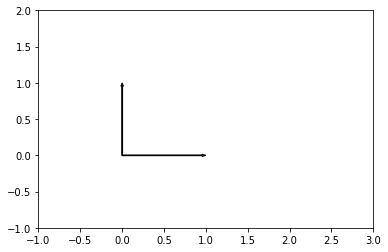

In [118]:
fig = plt.figure()
ax = fig.gca()
ax.arrow(*v1, width=.01, length_includes_head=True)
ax.arrow(*v2, width=.01, length_includes_head=True)
ax.set_xlim(-1, 3)
ax.set_ylim(-1, 2)
plt.draw()
plt.show()

A synonym for othogonal is perpendicular

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
def dot_product(a, b):
  product = 0  
  if len(a) != len(b):
    return 'Vectors must be of equal length'
  for x, y in zip(a, b):
    product += x * y
  return product

In [120]:
a = np.array([-5, 3, 7])
b = np.array([6, -8, 2])
dot_product(a, b)

-40

These vecors are not orthogonal. I'm pretty sure the form an oblique angle.

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
def norm(a):
  norm = 0
  for x in a:
    norm += x**2
  return norm**0.5

def matrix_multiply(a, b):
  if len(a.shape) == 1 or len(b.shape) == 1:
    return dot_product(a, b)
  dim = a.shape[0], b.shape[1]
  new = np.zeros((dim[0], dim[1]))
  for i in range(dim[0]):
    for j in range(dim[1]):
      new[i, j] = int(dot_product(a[i], b.T[j]))
  return new


In [138]:
c = np.array([2, -15, 6, 20])
print(norm(c)**2)
print(dot_product(c, c))
print(np.matmul(c.transpose(), c))
print(matrix_multiply(c, c.transpose()))

665.0
665
665
665


In [137]:
print(matrix_multiply(c.T, c))

665


They are all equivalent!

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

$
d = 7 \hat i + 12 \hat j
$

$
e = 2 \hat i + 11 \hat j + -8 \hat k
$

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [139]:
f = np.array([4, 12, 11, 9, 2])
f_n = norm(f)
unit_f = (1/f_n) * f
unit_f

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

In [0]:
vectors = np.array([[0, 0, 0, 1, 2, 2],
                    [0, 0, 0, 2, 1, 3],
                    [0, 0, 0, 1, 1, 1],
                    [0, 0, 0, 3.14, 3.14, 3.14]])
                    

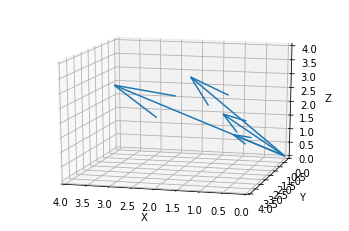

In [158]:
%matplotlib inline
X, Y, Z, U, V, W = zip(*vectors)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1)
ax.set_xlim([0, 4])
ax.set_ylim([0, 4])
ax.set_zlim([0, 4])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(15, 105)
plt.draw()


# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

span = $\mathbb{R}$

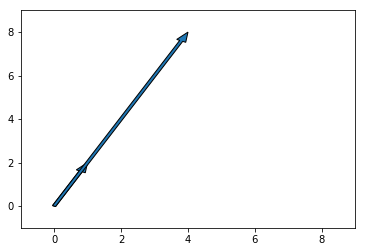

In [160]:
vg = np.array([0, 0, 1, 2])
vh = np.array([0, 0, 4, 8])
fig = plt.figure()
ax = fig.gca()
ax.arrow(*vg, width=.1, length_includes_head=True)
ax.arrow(*vh, width=.1, length_includes_head=True)
ax.set_xlim(-1, 9)
ax.set_ylim(-1, 9)
plt.draw()
plt.show()

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [163]:
lmn = np.array([[1, 2, 3], [-1, 0, 7], [4, 8, 2]])
rank = np.linalg.matrix_rank(lmn)
rank

3

Span of lmn is $\mathbb{R}^3$.

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



In [0]:
vi = np.array([0, 0, 1, 0])
vj = np.array([0, 0, 0, 1])

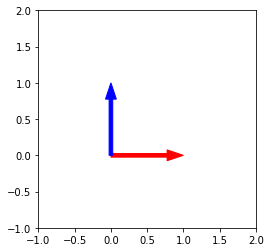

In [170]:
fig = plt.figure()
ax = fig.gca()
ax.arrow(*vi, width=.05, length_includes_head=True, color='r')
ax.arrow(*vj, width=.05, length_includes_head=True, color='b')
ax.set_xlim(-1, 2)
ax.set_ylim(-1, 2)
ax.set_aspect('equal')
plt.draw()
plt.show()

## 6.2 What does it mean to form a basis?

A set of vectors that are linearly independent and any tranformations of these vectors in this space can be acheived by scaling and adding these vectors to reach any point in the space.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [172]:
p = np.array([[1, 2, 3], [-1, 0, 7], [4, 8, 2]])
pr = np.linalg.matrix_rank(p)
pr

3

## 7.2 What does the rank of a matrix tell us?

The true dimensionality of the matrix.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

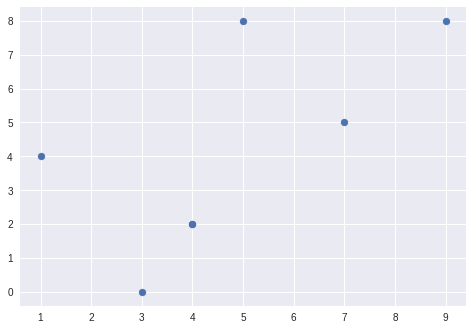

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()